# Sentiment

The following Jupyter notebook extracts the final dataframe and looks into the sentiment assigned to the processed comments through a pre-trained HuggingFace transformer. Visualizations of the sentiment analysis has been stored in the folder 'outputs'.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
df = pd.read_pickle("../data/df_final.pkl")

### 1. Sentiment Distribution

The following visualization shows how most comments made under the EPA agency follow the sentiments of 'NEGATIVE' or 'NEUTRAL'. This analysis aligns with the psychological and sociological thoery of negativity bias and dominance, highlighting how people are more prone to avoid negative/bad outcomes than vice versa.

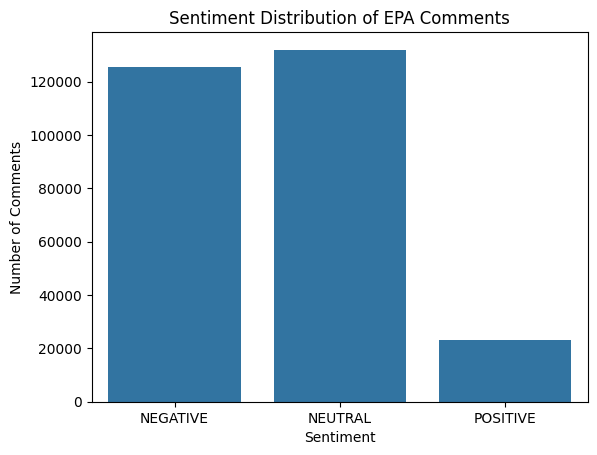

In [ ]:
sns.countplot(x='sentiment_text', data=df, order=["NEGATIVE", "NEUTRAL", "POSITIVE"])
plt.title("Sentiment Distribution of EPA Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.savefig("../outputs/sentiment_distribution.png", dpi=300)
plt.show()


### 2. Average Sentiment Score for top 10 dockets

The following visualization shows the average sentiment score for the top 10 most commented-on dockets.

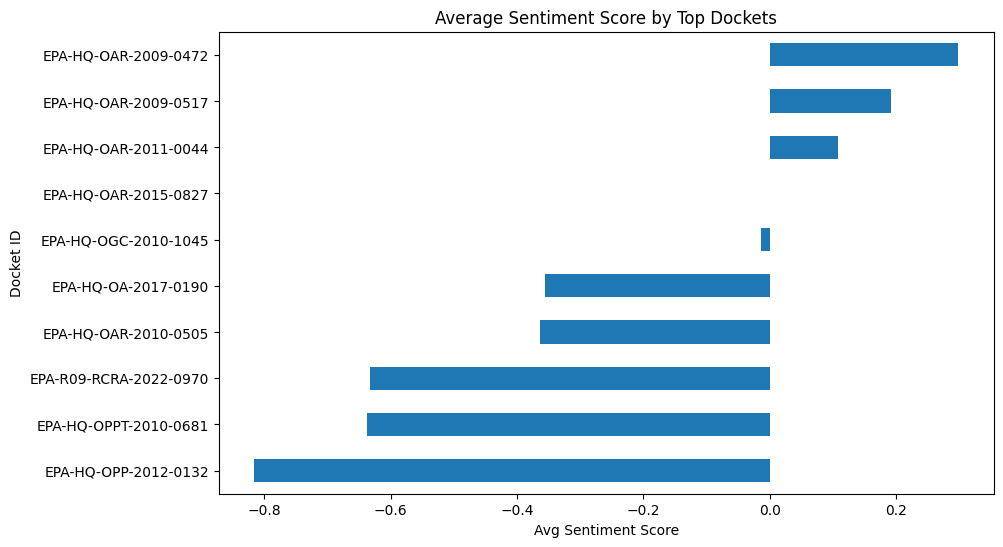

In [3]:
top_dockets = df["docketId"].value_counts().head(10).index
docket_sentiment = df[df["docketId"].isin(top_dockets)].groupby("docketId")["sentiment_score"].mean().sort_values()

docket_sentiment.plot(kind="barh", title="Average Sentiment Score by Top Dockets", figsize=(10, 6))
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Docket ID")
plt.savefig("../outputs/sentiment_top_dockets.png", dpi=300)
plt.show()

### 3. Average sentiment

The following time-series graph shows average sentiment of comments uploaded under the EPA agency over time

/tmp/ipykernel_559305/1863180584.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["postedDate"].dt.to_period("M")


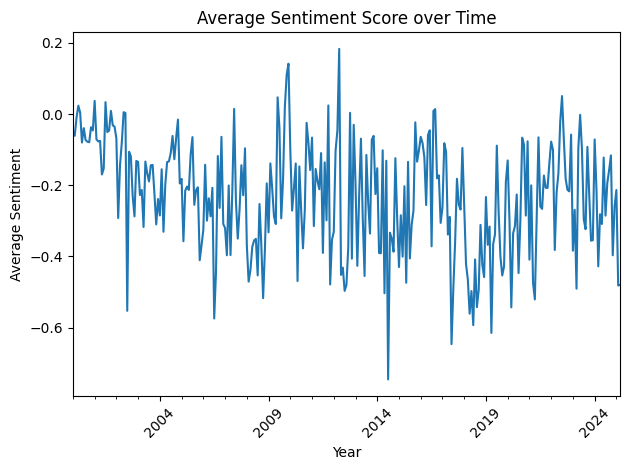

In [4]:
df["postedDate"] = pd.to_datetime(df["postedDate"])
df["month"] = df["postedDate"].dt.to_period("M")
monthly_sentiment = df.groupby("month")["sentiment_score"].mean()

monthly_sentiment.plot(title="Average Sentiment Score over Time")
plt.ylabel("Average Sentiment")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/sentiment_time.png", dpi=300)
plt.show()

### 4. Sentiment Distribution of Top 10 dockets

The following visualization shows the frequency/quantity of Negative, Neutral, and Positive comments posted under the top 10 dockets.

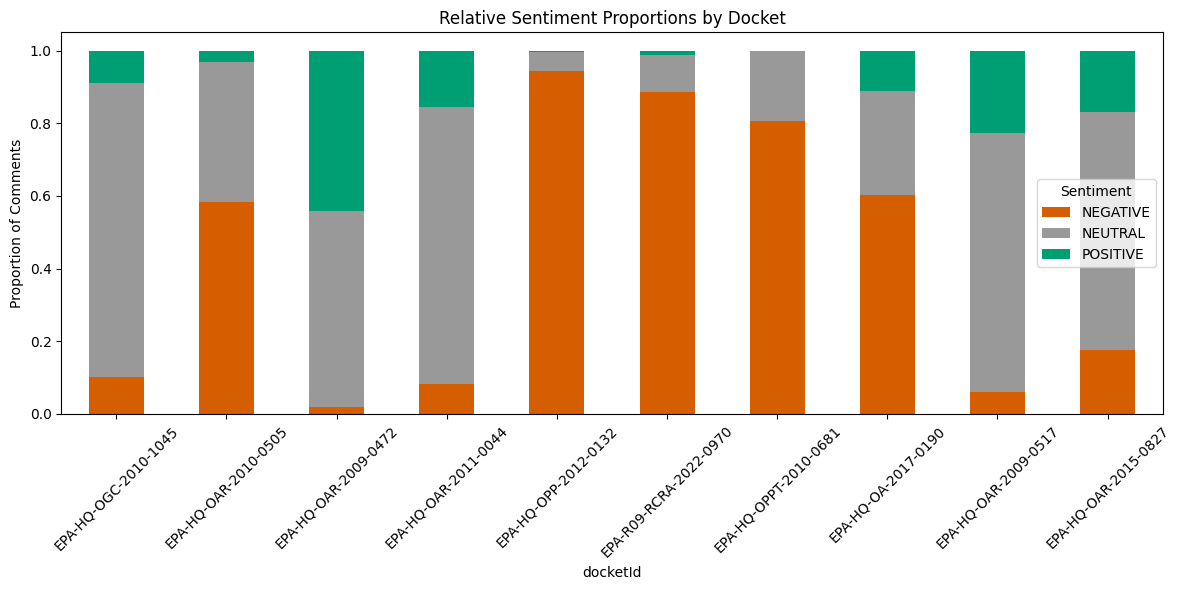

In [ ]:
# Make sure sentiment_text column exists
assert "sentiment_text" in df.columns

# Step 1: Count sentiment per docket
docket_sentiment_counts = df.groupby(["docketId", "sentiment_text"]).size().reset_index(name="count")

# Step 2: Pivot into wide format
pivot_df = docket_sentiment_counts.pivot(index="docketId", columns="sentiment_text", values="count").fillna(0)

# Step 3: Normalize to proportions
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 4: Pick top N dockets to visualize
top_dockets = df["docketId"].value_counts().head(10).index
proportions_df = proportions_df.loc[top_dockets]

# Step 5: Plot as stacked bar chart
proportions_df[["NEGATIVE", "NEUTRAL", "POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#D55E00", "#999999", "#009E73"]
)

plt.ylabel("Proportion of Comments")
plt.title("Relative Sentiment Proportions by Docket")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.savefig("../outputs/relative_sentiment_top10.png", dpi=300)
plt.show()

### 5. Histogram of sentiment score frequency

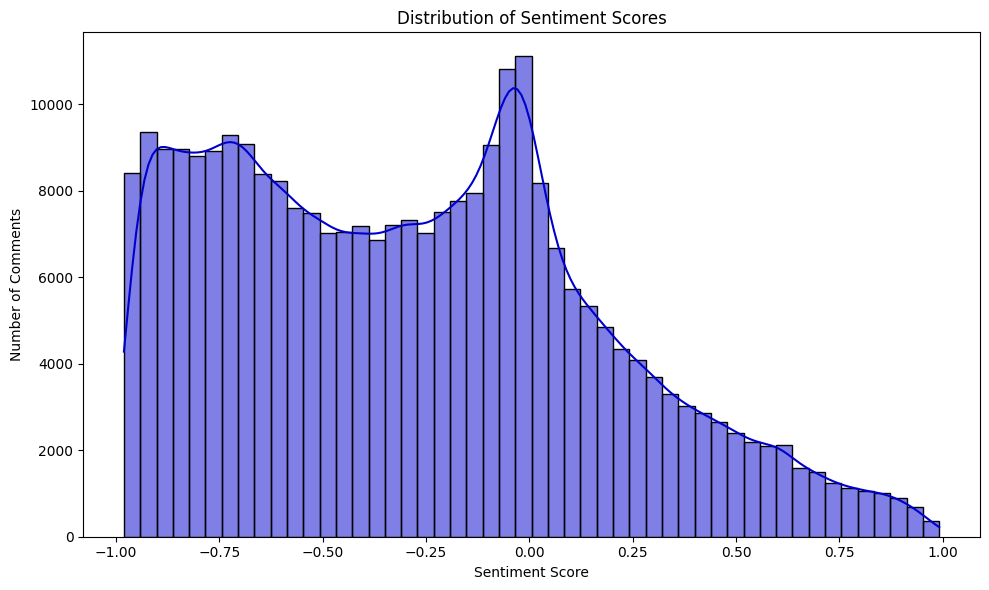

In [4]:
plt.figure(figsize=(10, 6))

# Plot histogram with density curve
sns.histplot(
    df["sentiment_score"], 
    bins=50, 
    kde=True,             # Add smooth density curve
    color="mediumblue", 
    edgecolor="black",
    alpha=0.5
)

plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.title("Distribution of Sentiment Scores")
plt.tight_layout()
plt.savefig("../outputs/sentiment_score_distribution.png", dpi=300)
plt.show()